In [ ]:
# https://github.com/coiled/dask-community/issues/166
# https://github.com/coiled/dask-community/issues/113

In [5]:
import dask
from dask import delayed
from dask.graph_manipulation import bind, wait_on

@delayed
def gpu_func(x):
    return x

@delayed
def non_gpu_func(x):
    return x

@delayed
def cleanup_gpu():
    pass

gpu_delayeds = [gpu_func(x) for x in range(3)]
non_gpu_delayeds = [non_gpu_func(x) for x in range(3)]
delayeds = gpu_delayeds + non_gpu_delayeds

# gpu_cleanup is now dependent on gpu_delayeds
new_cleanup = bind(cleanup_gpu(), gpu_delayeds)
# ensure dependents of new_cleanup wait until gpu_delayeds are done
wait_delayeds = wait_on(new_cleanup, *gpu_delayeds)

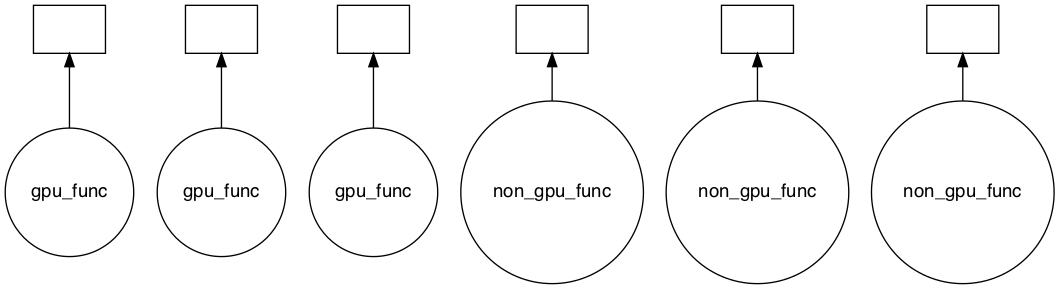

In [9]:
dask.visualize(delayeds)

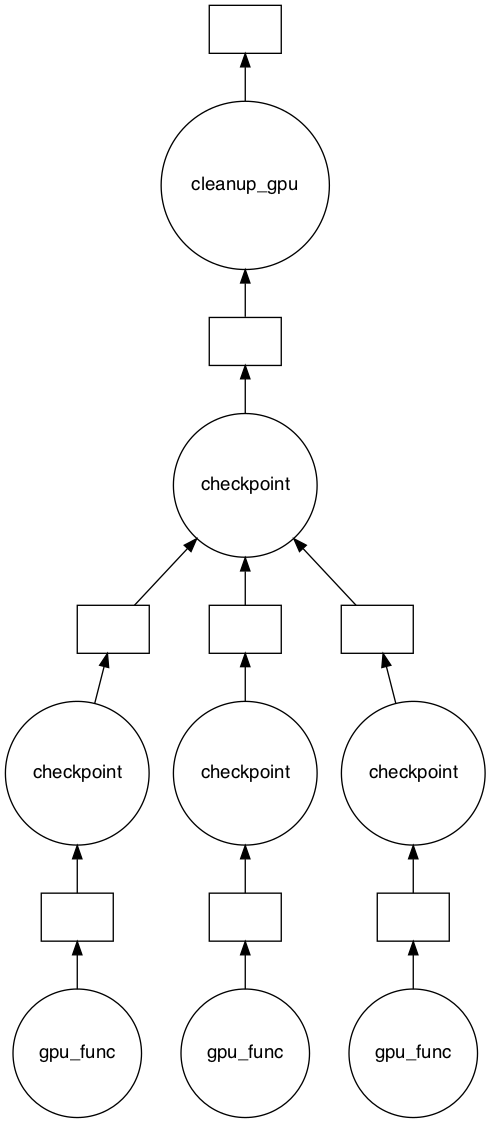

In [10]:
dask.visualize(new_cleanup)

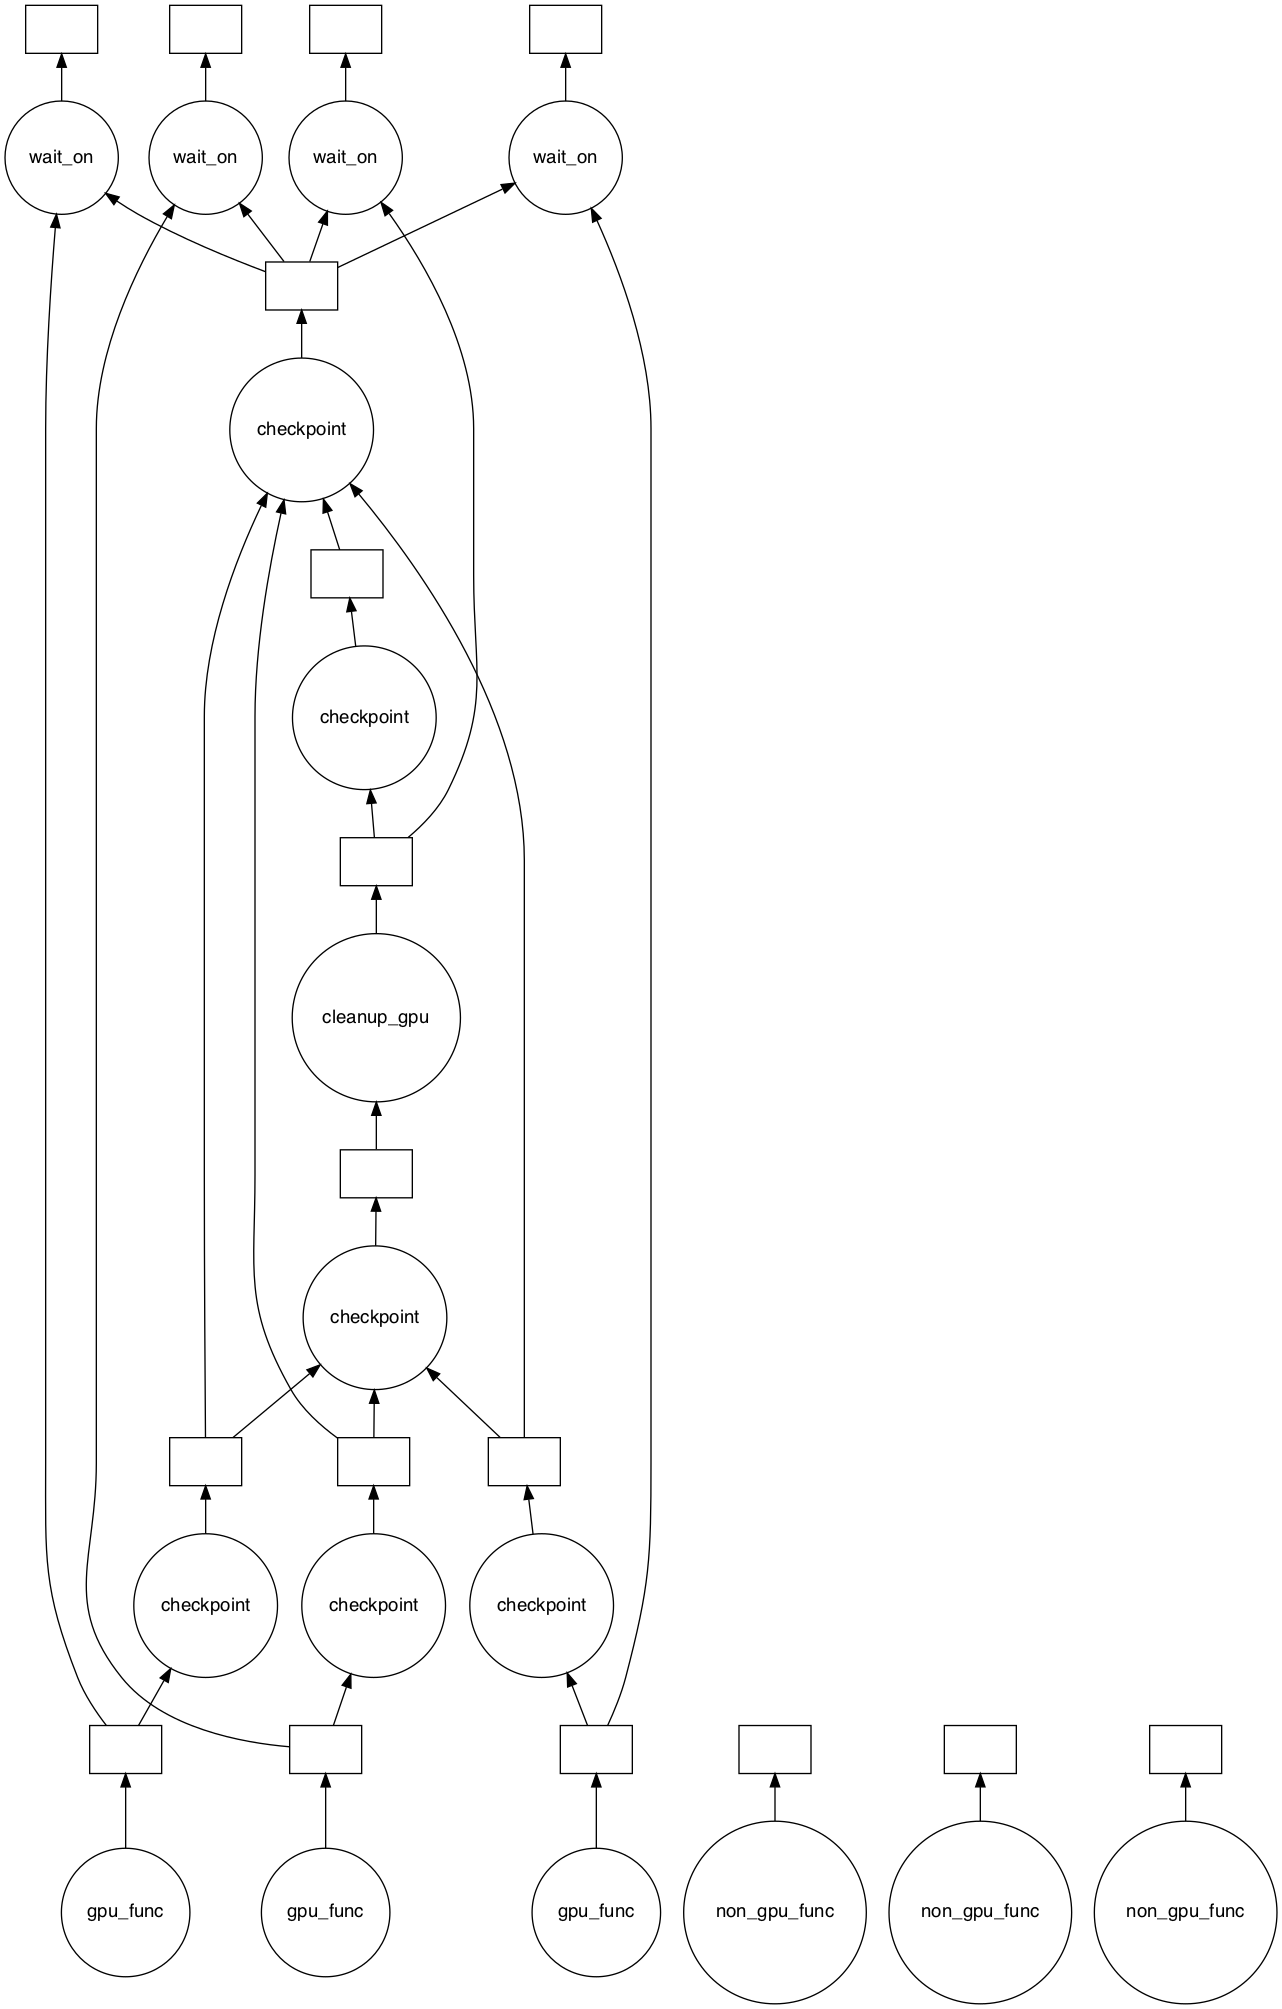

In [11]:
dask.visualize(list(wait_delayeds) + non_gpu_delayeds)

In [13]:
import dask
from dask import delayed
from dask.graph_manipulation import bind, wait_on

@delayed
def func(x):
    return x

@delayed
def release():
    pass

delayeds = [func(x) for x in range(3)]

# release is now dependent on delayeds
new_cleanup = bind(release(), delayeds)
# ensure dependents of new_cleanup wait until delayeds are done
# wait_delayeds = wait_on(new_cleanup, *delayeds)

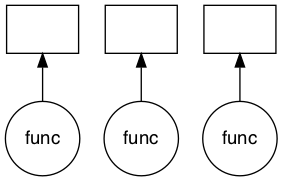

In [14]:
dask.visualize(delayeds, optimize_graph=True)

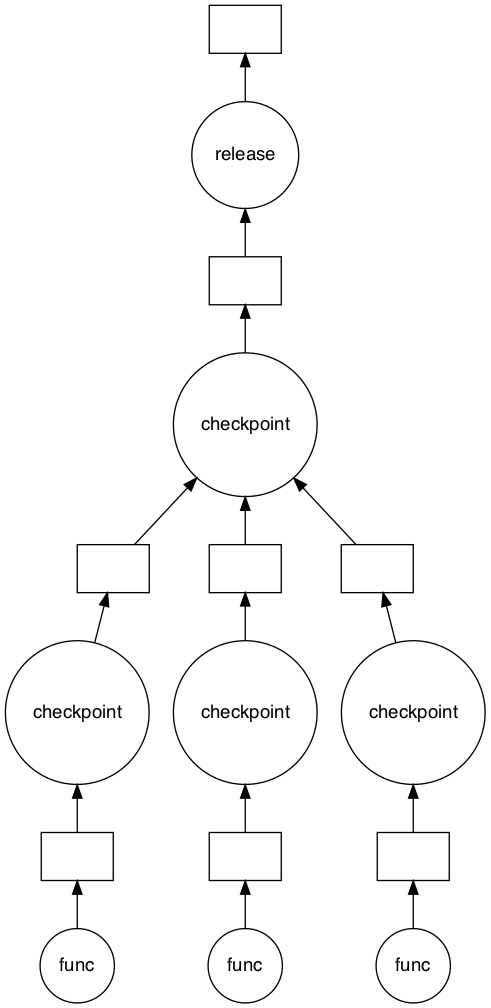

In [16]:
dask.visualize(delayeds + [new_cleanup], optimize_graph=True)

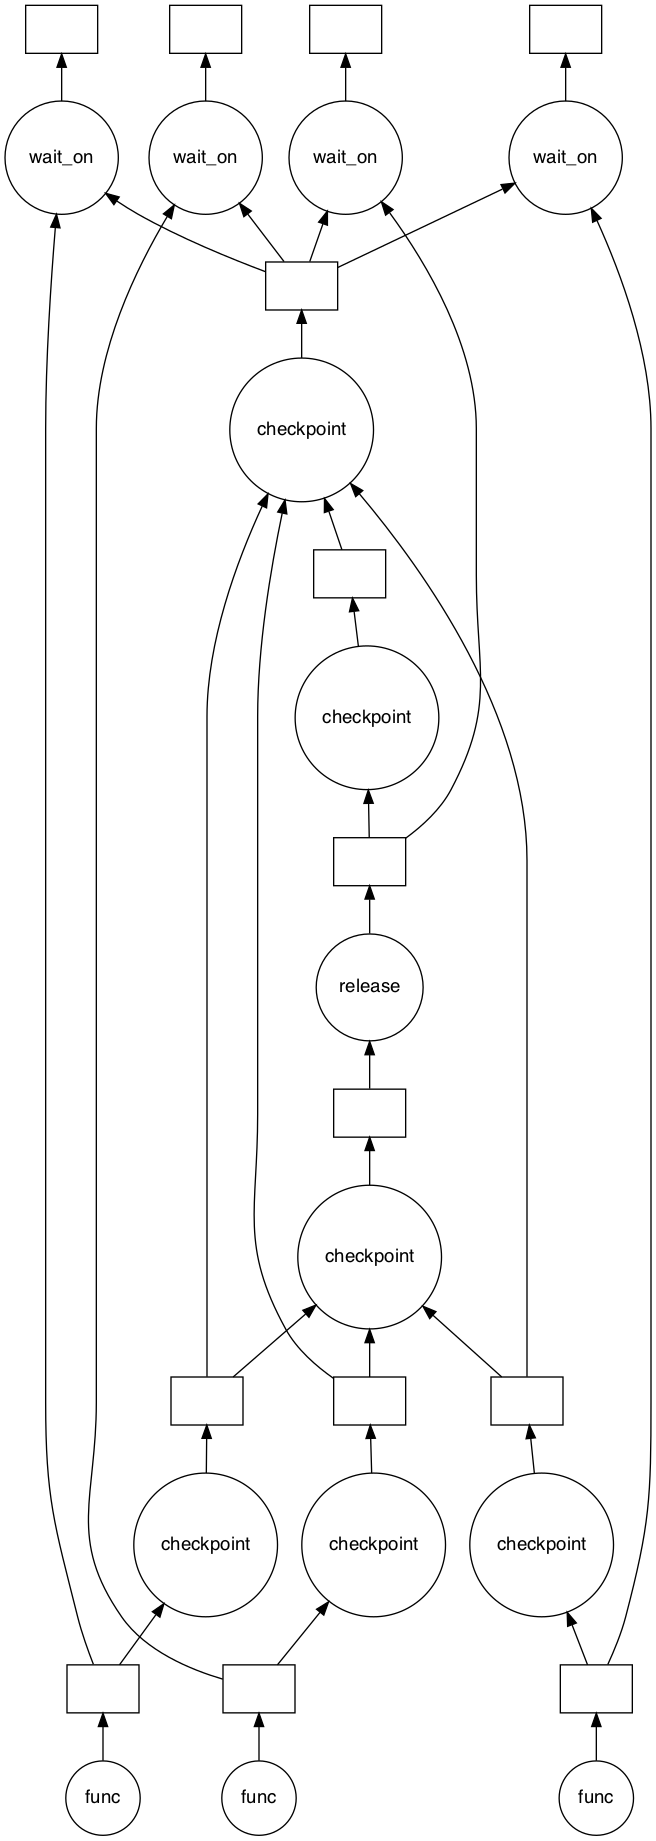

In [5]:
dask.visualize(wait_delayeds)

In [6]:
wait_cleanup, *wait_delayeds = wait_on(new_cleanup, *delayeds)

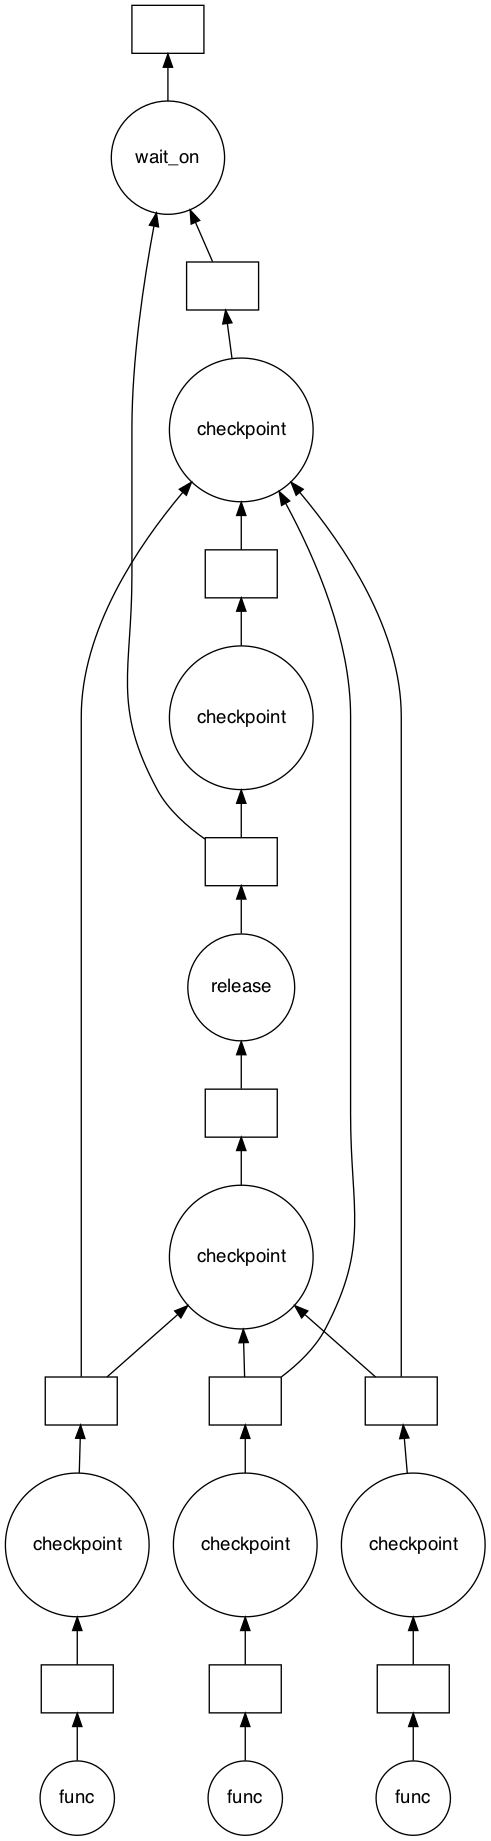

In [7]:
dask.visualize(wait_cleanup)

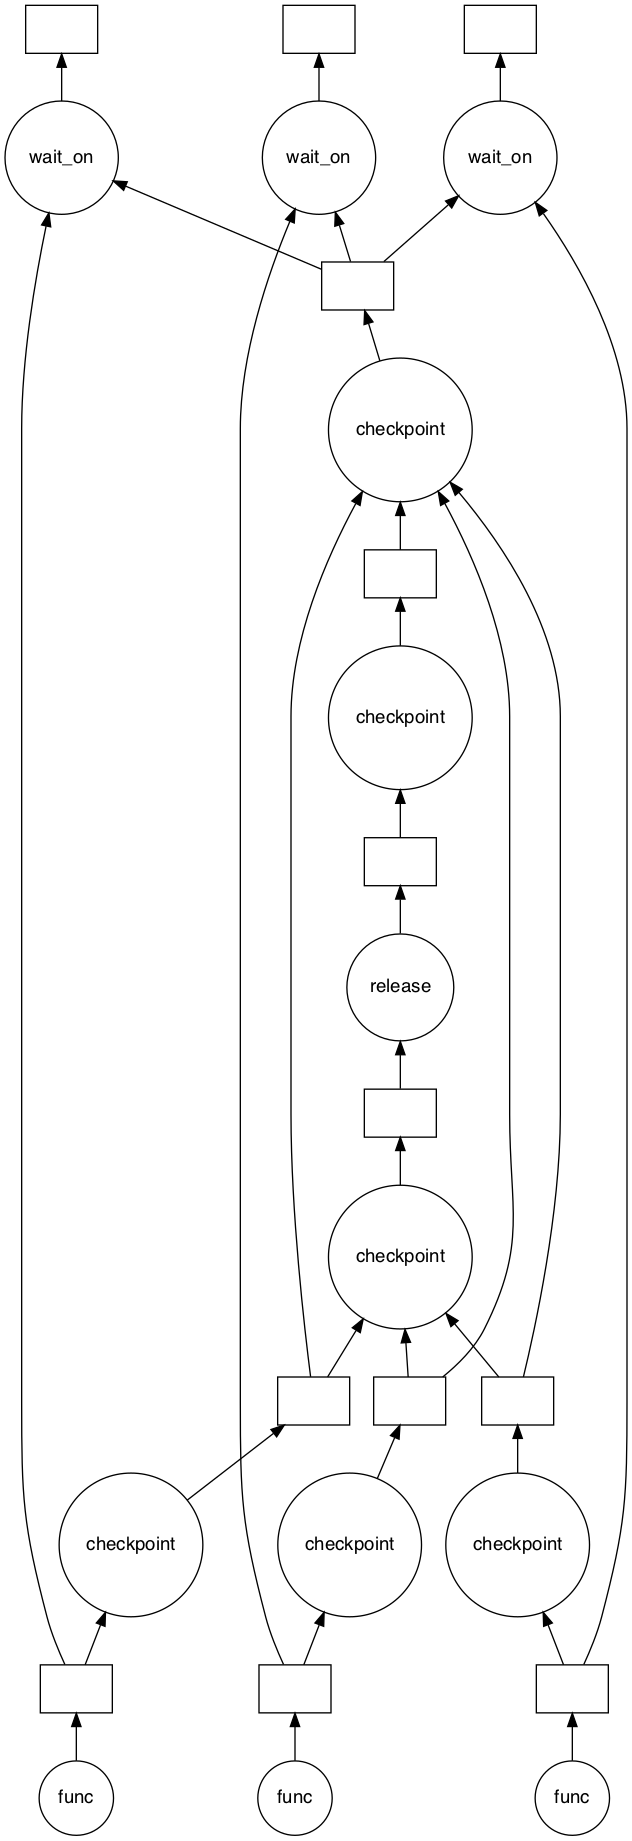

In [10]:
dask.visualize(wait_delayeds, optimize_graph=True)

In [3]:
dask.visualize?

Signature:
dask.visualize(
    *args,
    filename='mydask',
    optimize_graph=False,
    maxval=None,
    **kwargs,
)
Docstring:
Visualize several low level dask graphs at once.

Requires ``graphviz`` to be installed. All options that are not the dask
graph(s) should be passed as keyword arguments.

Parameters
----------
args : dict(s) or collection(s)
    The low level dask graph(s) to visualize.
filename : str or None, optional
    The name of the file to write to disk. If the provided `filename`
    doesn't include an extension, '.png' will be used by default.
    If `filename` is None, no file will be written, and we communicate
    with dot using only pipes.
format : {'png', 'pdf', 'dot', 'svg', 'jpeg', 'jpg'}, optional
    Format in which to write output file.  Default is 'png'.
optimize_graph : bool, optional
    If True, the graph is optimized before rendering.  Otherwise,
    the graph is displayed as is. Default is False.
color : {None, 'order', 'ages', 'freed', 'memoryincr